## Import librairies

In [75]:
%matplotlib inline

from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification, load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from yellowbrick.cluster import InterclusterDistance, SilhouetteVisualizer, KElbowVisualizer


pd.set_option("display.max_columns", None)

## Load the dataset

We will start by loading the digits dataset. This dataset contains handwritten digits from 0 to 9. In the context of clustering, one would like to group images such that the handwritten digits on the image are the same.

In [76]:
digits = load_digits()  # Dimensionality: 64 features

X, labels = digits.data, digits.target
images = digits.images

# column name for 64
column_names = [f"X{i}" for i in range(64)]

data = pd.DataFrame(X, columns=column_names).assign(label=labels)

(n_samples, n_features), n_digits = X.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [77]:
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## EDA

<ipython-input-78-5a6f7f88c0c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='tab10')


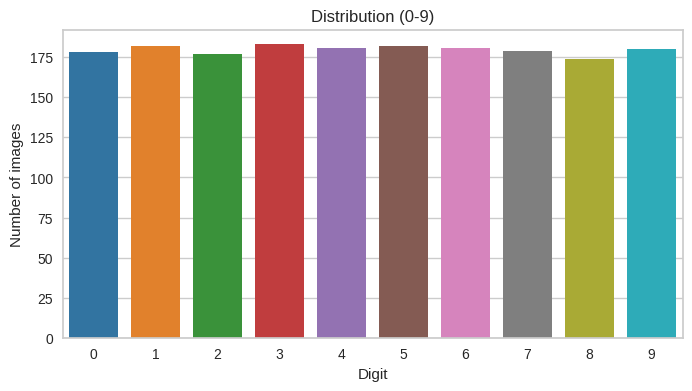

In [78]:
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=data, palette='tab10')

plt.title("Distribution (0-9)")
plt.xlabel("Digit")
plt.ylabel("Number of images")
plt.show()

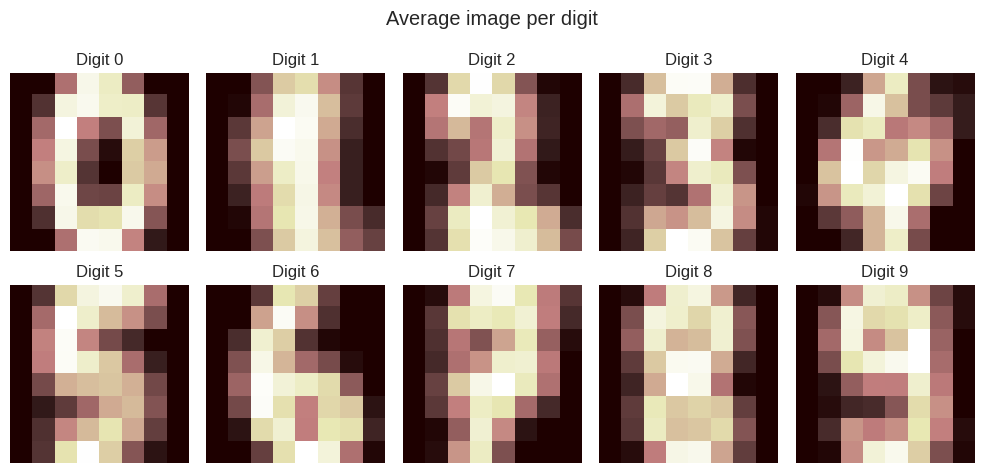

In [79]:
# mean by digit
mean_images = np.zeros((10, 64))  # 64 pixels
for i in range(10):
    mean_images[i] = data.loc[data.label == i, column_names].mean(axis=0)


fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(mean_images[i].reshape(8, 8), cmap='pink')
    ax.set_title(f"Digit {i}")
    ax.axis('off')
plt.suptitle("Average image per digit")
plt.tight_layout()
plt.show()

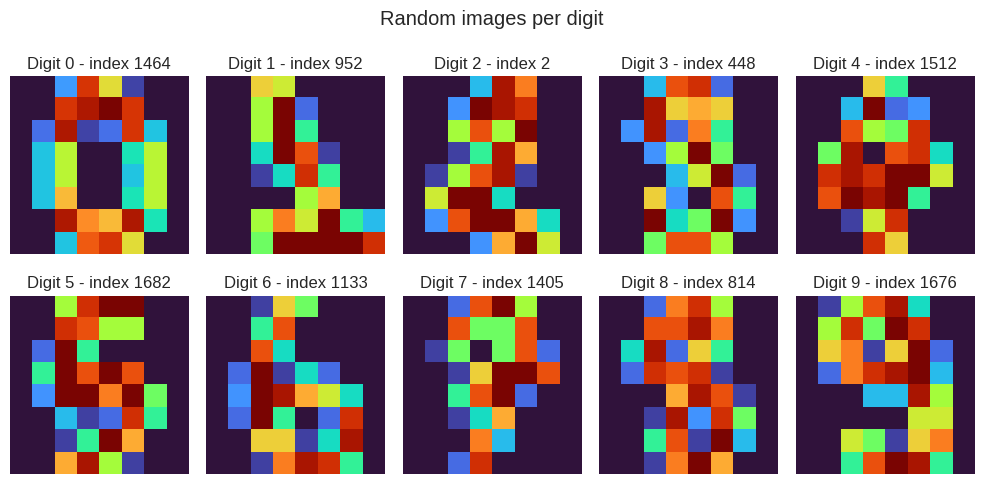

In [80]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.91, hspace=0.5)

for i, label in enumerate(np.unique(labels)):
    ax = axs[i // 5, i % 5]
    # Random choice by digit
    idx = np.random.choice(np.where(labels == label)[0])
    ax.imshow(images[idx], cmap='turbo')
    ax.set_title(f"Digit {label} - index {idx}")
    ax.axis('off')

plt.suptitle("Random images per digit")
plt.tight_layout()
plt.show();
# on peut utiliser la library opencv pour faire le resizing au cas ou les images n'ont pas

## Define our evaluation benchmark

We will first our evaluation benchmark. During this benchmark, we intend to compare different initialization methods for KMeans. Our benchmark will:

create a pipeline which will scale the data using a StandardScaler;

train and time the pipeline fitting;

measure the performance of the clustering obtained via different metrics.


In [81]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(MinMaxScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]


    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

### Run benchmark

In [82]:
print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=X, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=X, labels=labels)

pca = PCA(n_components=0.99).fit(X) # Aide moi à choisir les axes qui donnent au total 99% des informations
kmeans = KMeans(#init=pca.components_,
                n_clusters=n_digits, n_init= 4)
bench_k_means(kmeans=kmeans, name="PCA-based", data=pca.transform(X), labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	silhouette
k-means++	0.051s	4647	0.739	0.747	0.743	0.669	0.178
random   	0.061s	4648	0.735	0.742	0.738	0.667	0.184
PCA-based	0.092s	1297	0.733	0.743	0.738	0.640	0.154
__________________________________________________________________________________


## Optimal number of clusters

In [83]:
scaler = MinMaxScaler()  # StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow method

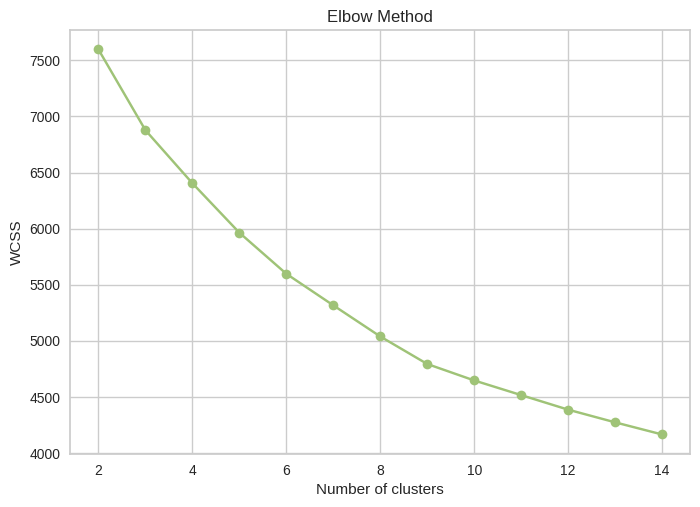

In [84]:
wcss = []  # Within-Cluster Sum of Squares

k_grid = range(2, 15)
for i in k_grid:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_grid, wcss, 'go-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Yellow brick lib

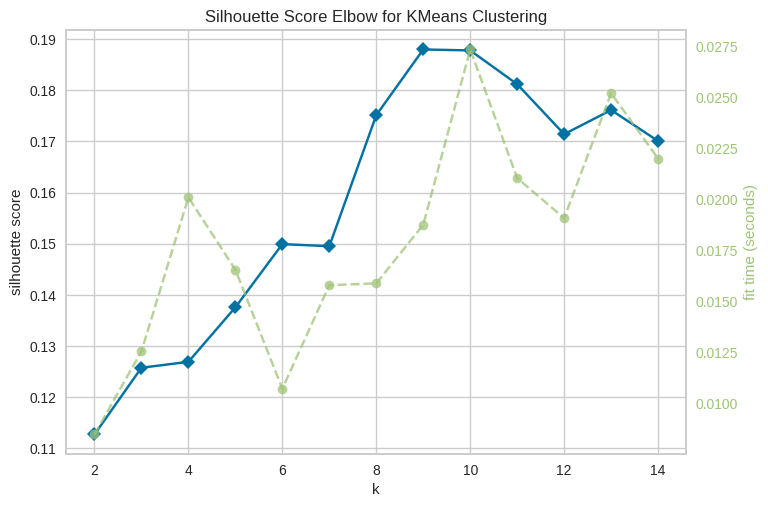

In [85]:
# Instantiate the clustering model and visualizer

# - **distortion**: mean sum of squared distances to centers
# - **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
# - **calinski_harabasz**: ratio of within to between cluster dispersion


visualizer = KElbowVisualizer(KMeans(),
                              metric='silhouette',  # possible values: calinski_harabasz, distortion, silhouette
                              distance_metric="euclidean", # options allowed by sklearn's metrics.pairwise.pairwise_distances
                              k=k_grid,
                              timings=True,
                              locate_elbow=False, # True or False
                             )

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();       # Finalize and render the figure

## Visualize the results on PCA-reduced data


### Profiling: cluster persona

In [86]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

kmean_labels = kmeans.labels_

In [87]:
data["cluster"] = kmean_labels
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,label,cluster
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,1
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,5
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,2
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,9


In [88]:
# Mapping cluster => label
contingency_table = pd.crosstab(data["cluster"], data["label"])
contingency_table

label,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,0,47,14,0,5,50,2,41,64,10
1,160,0,0,0,0,5,8,0,0,0
2,0,0,3,96,0,1,0,0,0,40
3,12,0,0,0,24,5,150,0,0,1
4,0,0,115,43,0,3,0,1,4,8
5,0,87,0,0,5,0,0,21,4,0
6,4,6,4,21,0,47,0,0,8,95
7,0,9,7,12,3,23,0,114,24,9
8,1,29,34,11,0,46,0,1,69,17


In [89]:
major_digit = contingency_table.idxmax(axis=1)
print(major_digit)

cluster
0    8
1    0
2    3
3    6
4    2
5    1
6    9
7    7
8    8
9    4
dtype: int64


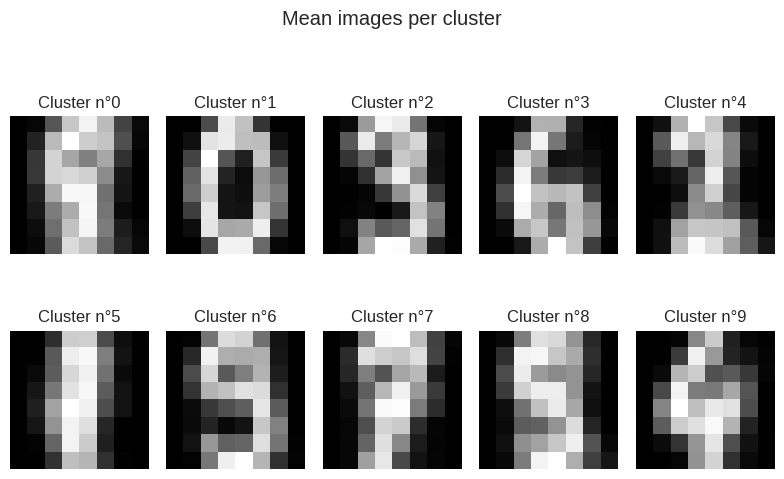

In [90]:
for cluster_id in range(n_digits):
    cluster_indices = np.where(kmean_labels == cluster_id)
    cluster_images = X[cluster_indices]
    mean_image = cluster_images.mean(axis=0).reshape(8, 8)

    plt.subplot(2, 5, cluster_id + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f"Cluster n°{cluster_id}")
    plt.axis('off')

plt.suptitle("Mean images per cluster")
plt.tight_layout()
plt.show()

### Visualization

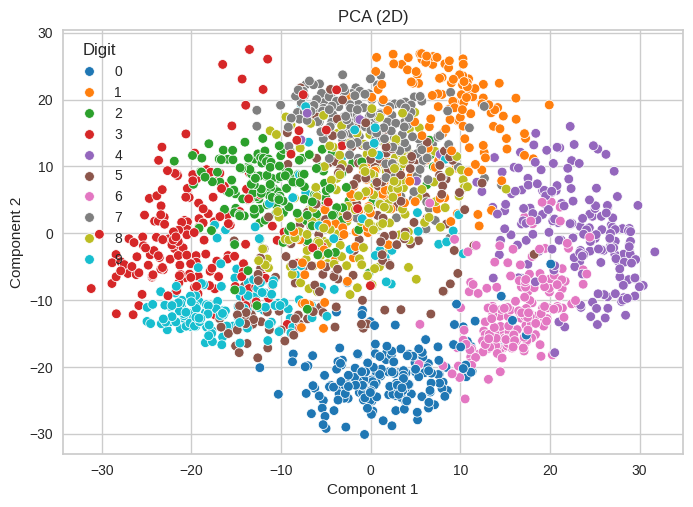

In [91]:
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data.label, palette='tab10', legend='full')
plt.title("PCA (2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Digit")
plt.show()


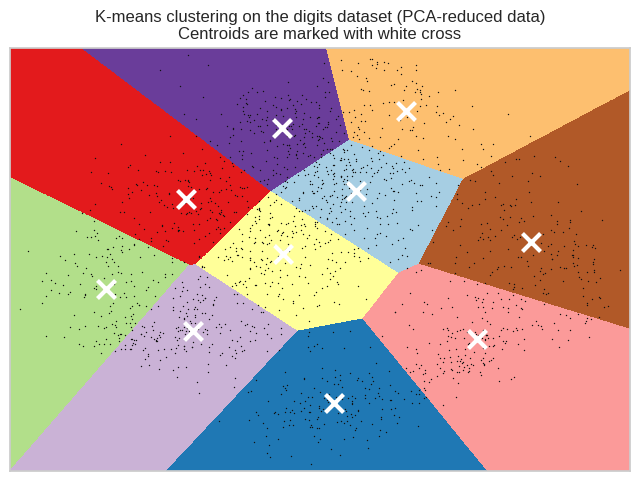

In [92]:


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());

## Intercluster Distance Maps

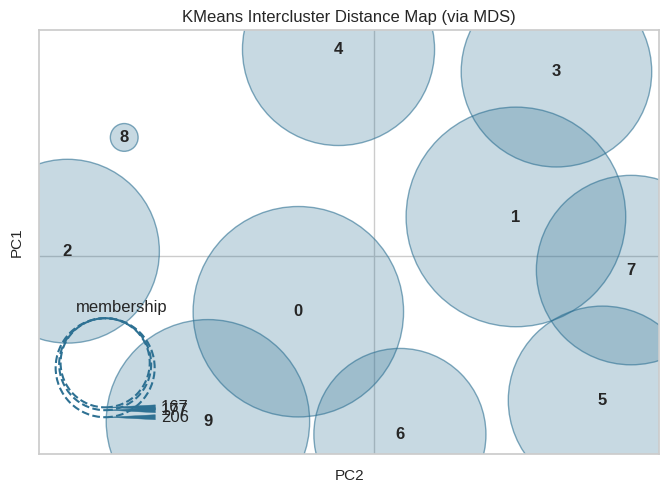

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [93]:
# Instantiate the clustering model and visualizer
model = KMeans(10)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Visualisation with TSNE

In [94]:
from sklearn.manifold import TSNE


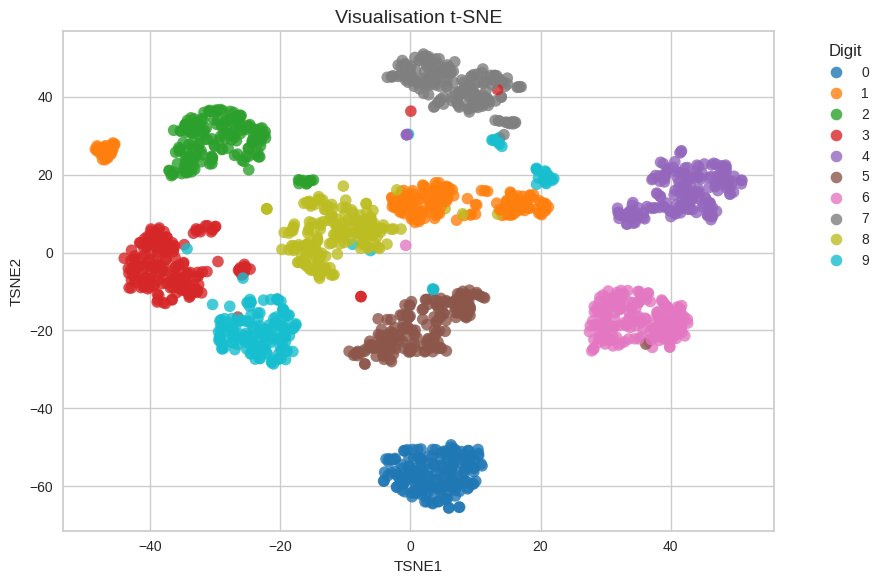

In [95]:
# Initialize
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['label'] = labels # Conversion en string pour une discrétisation catégorielle

# Plot
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df_tsne,
    x='TSNE1',
    y='TSNE2',
    hue='label',
    palette='tab10',
    alpha=0.8,
    s=70,
    edgecolor='none'
)
plt.title('Visualisation t-SNE', fontsize=14)
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



#                                **TP Clustering**

## **Optimiser** k-means avec au moins 3 hyperparametres

In [96]:
from sklearn.model_selection import ParameterGrid

In [97]:
# Grille des hyperparamètres
param_grid = {
    'n_clusters': range(2, 15),  # 2 à 14 clusters
    'init': ['k-means++', 'random'],
    'n_init': [10, 20]
}

print(82 * "_")
print("init/nclus\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette")

for params in ParameterGrid(param_grid):
    name = f"{params['init']}/{params['n_clusters']}"
    kmeans = KMeans(
        init=params['init'],
        n_clusters=params['n_clusters'],
        n_init=params['n_init'],
        random_state=0
    )
    bench_k_means(kmeans=kmeans, name=name, data=X, labels=labels)

__________________________________________________________________________________
init/nclus	time	inertia	homo	compl	v-meas	ARI	silhouette
k-means++/2	0.049s	7596	0.232	0.858	0.365	0.139	0.126
k-means++/2	0.134s	7596	0.232	0.860	0.366	0.139	0.115
k-means++/3	0.102s	6877	0.313	0.660	0.424	0.237	0.130
k-means++/3	0.161s	6877	0.313	0.660	0.424	0.237	0.135
k-means++/4	0.108s	6404	0.367	0.611	0.459	0.294	0.128
k-means++/4	0.155s	6404	0.367	0.611	0.459	0.294	0.126
k-means++/5	0.136s	5964	0.454	0.670	0.541	0.357	0.136
k-means++/5	0.186s	5961	0.486	0.719	0.580	0.387	0.135
k-means++/6	0.106s	5597	0.523	0.695	0.597	0.430	0.154
k-means++/6	0.180s	5597	0.523	0.695	0.597	0.430	0.144
k-means++/7	0.135s	5316	0.590	0.727	0.651	0.486	0.157
k-means++/7	0.228s	5316	0.590	0.727	0.651	0.486	0.144
k-means++/8	0.165s	5039	0.673	0.769	0.718	0.580	0.185
k-means++/8	0.203s	5039	0.673	0.769	0.718	0.580	0.185
k-means++/9	0.138s	4794	0.689	0.747	0.717	0.594	0.180
k-means++/9	0.238s	4793	0.692	0.751	0.720	0.598	0.

Pour l'optimisation, on remarque que plus on se rapproche de n_clusters = 11 (random/kmeans++) plus le score d'ARI s'améliore.Globalement, kmeans donne de meilleurs perfomances que random. Le meilleur score d'ARI est obtenu pour n_clusters =11 et pour le kmeans++. On conclut que notre meilleur modèle est kmeans_best = KMeans(n_clusters=11, init="k-means++", n_init=10, random_state=0)


## **Test** de l'optimisation du k-means avec et sans réduction de dimension (PCA)


D'après la question précédente, le meilleur modèle après optimisation est le modèle avec 11 clusters. En se basant sur ce modèle nous allons tester la réduction de dimension

In [98]:
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X)
param_grid = {
    'n_clusters': range(2, 15),  # 2 à 14 clusters
    'init': ['k-means++', 'random'],
    'n_init': [10, 20]
}

print(82 * "_")
print("init/nclus\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette")

for params in ParameterGrid(param_grid):
    name = f"{params['init']}/{params['n_clusters']}"
    kmeans = KMeans(
            init=params['init'],
            n_clusters= params['n_clusters'],
            n_init=params['n_init'],
            random_state=0
        )
    bench_k_means(kmeans=kmeans, name=name, data=X_pca, labels=labels)


__________________________________________________________________________________
init/nclus	time	inertia	homo	compl	v-meas	ARI	silhouette
k-means++/2	0.062s	1577	0.232	0.867	0.366	0.138	0.119
k-means++/2	0.124s	1577	0.232	0.867	0.366	0.138	0.111
k-means++/3	0.118s	1522	0.305	0.665	0.419	0.227	0.118
k-means++/3	0.274s	1522	0.305	0.665	0.419	0.227	0.113
k-means++/4	0.102s	1480	0.388	0.692	0.497	0.284	0.130
k-means++/4	0.275s	1480	0.388	0.692	0.497	0.284	0.134
k-means++/5	0.146s	1439	0.476	0.710	0.570	0.382	0.137
k-means++/5	0.330s	1439	0.476	0.710	0.570	0.382	0.139
k-means++/6	0.172s	1403	0.538	0.732	0.621	0.422	0.146
k-means++/6	0.313s	1402	0.541	0.750	0.628	0.415	0.143
k-means++/7	0.218s	1368	0.622	0.773	0.689	0.507	0.159
k-means++/7	0.380s	1368	0.622	0.773	0.689	0.507	0.164
k-means++/8	0.238s	1342	0.714	0.815	0.761	0.623	0.189
k-means++/8	0.355s	1342	0.714	0.815	0.761	0.623	0.184
k-means++/9	0.221s	1317	0.726	0.777	0.751	0.634	0.186
k-means++/9	0.298s	1316	0.725	0.778	0.750	0.635	0.

Le meilleur modèle sur les données réduites par PCA est obtenu avec KMeans(n_clusters=13, init="k-means++").  Il atteint les meilleurs scores d’homogénéité et d’ARI, ce qui indique que les clusters trouvés par le modèle sont bien alignés avec les vraies classes du jeu de données. Cependant,la comparaison entre les résultats du clustering KMeans avec et sans réduction de dimension  montre  que la version sans réduction donne de meilleures performances globales. Le modèle k-means++/11 (sans PCA) est globalement meilleur pour ce jeu de données. Il offre d'excellentes perfomances en terme de qualité du clustering, précision par rapport aux vraies classes (ARI), sans passer par la réduction de dimension.

## **Test** de l'optimisation avec ou sans standardisation (Minmax, Standardscaller, Robustscaller)

In [99]:

# Définition des scalers
scalers = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler()
}

# Grille des paramètres
param_grid = {
    'n_clusters': range(2, 15),  # de 2 à 14 clusters
    'init': ['k-means++', 'random'],
    'n_init': [10, 20]
}

print("init/scale\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette")

for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    for params in ParameterGrid(param_grid):
        name = f"{params['init']}/{params['n_clusters']}/{scaler_name}"

        kmeans = KMeans(
            init=params['init'],
            n_clusters=params['n_clusters'],
            n_init=params['n_init'],
            random_state=0
        )

        bench_k_means(kmeans=kmeans, name=name, data=X_scaled, labels=labels)


init/scale	time	inertia	homo	compl	v-meas	ARI	silhouette
k-means++/2/standard	0.067s	7596	0.232	0.858	0.365	0.139	0.105
k-means++/2/standard	0.135s	7596	0.232	0.860	0.366	0.139	0.108
k-means++/3/standard	0.102s	6877	0.313	0.660	0.424	0.237	0.099
k-means++/3/standard	0.156s	6877	0.313	0.660	0.424	0.237	0.074
k-means++/4/standard	0.120s	6404	0.367	0.611	0.459	0.294	0.085
k-means++/4/standard	0.164s	6404	0.367	0.611	0.459	0.294	0.072
k-means++/5/standard	0.139s	5964	0.454	0.670	0.541	0.357	0.071
k-means++/5/standard	0.187s	5961	0.486	0.719	0.580	0.387	0.103
k-means++/6/standard	0.108s	5597	0.523	0.695	0.597	0.430	0.091
k-means++/6/standard	0.184s	5597	0.523	0.695	0.597	0.430	0.095
k-means++/7/standard	0.138s	5316	0.590	0.727	0.651	0.486	0.104
k-means++/7/standard	0.240s	5316	0.590	0.727	0.651	0.486	0.098
k-means++/8/standard	0.164s	5039	0.673	0.769	0.718	0.580	0.123
k-means++/8/standard	0.205s	5039	0.673	0.769	0.718	0.580	0.137
k-means++/9/standard	0.137s	4794	0.689	0.747	0.717	0.594	0.14

Lorsqu'on applique la standardisation sur les données (peut importe le type de standardisation que l'on réalise). Le meilleur modèle semble être  kmeans++/n_clusters = 11. Ce modèle donne les mêmes scores e que le modèle sans standardisation ainsi pour la suite que l'on standardise nos données ou pas,notre modèle donne de bonne perfomance.

## Analyse des personas pour le modèle Kmeans++/11

Pour faire l'analyse des personas nous allons suivre ces étapes:
- Appliquer le meilleur modèle sur nos données
- Ajouter les clusters aux données
- faire le profilage des clusters
- Visualiser les personas

In [111]:
# Application du meilleur modèle
best_model = KMeans(n_clusters=11, init='k-means++', n_init=20, random_state=0)
clusters = best_model.fit_predict(X)

# Ajout des clusters aux données
data['cluster'] = clusters



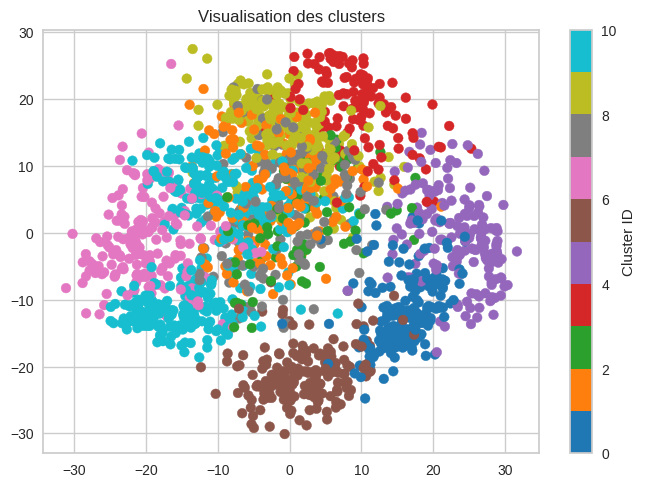

In [112]:
# Visualisation des clusters sur deux axes
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10')
plt.title("Visualisation des clusters")
plt.colorbar(label="Cluster ID")
plt.show()


In [113]:
# profilage des clusters
contingency_table = pd.crosstab(data["cluster"], data["label"])
contingency_table


label,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,0,2,0,0,0,2,176,0,1,0
1,0,0,11,6,3,0,1,3,134,4
2,0,54,2,0,5,0,0,2,6,20
3,0,100,2,0,5,0,3,1,10,0
4,1,0,0,0,162,2,0,0,0,0
5,177,0,1,0,0,0,1,0,0,0
6,0,1,12,159,0,1,0,0,0,4
7,0,1,0,2,0,137,0,0,2,4
8,0,0,2,7,6,0,0,173,3,7


In [114]:
# verification des labels associée à chaque clusters
major_digit = contingency_table.idxmax(axis=1)
print(major_digit)

cluster
0     6
1     8
2     1
3     1
4     4
5     0
6     3
7     5
8     7
9     9
10    2
dtype: int64


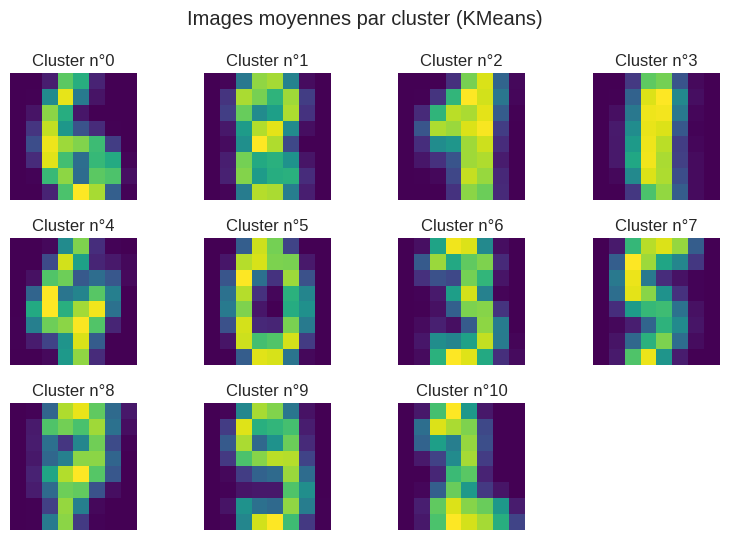

In [115]:
n_clusters = 11
for cluster_id in range(n_clusters):
    cluster_indices = np.where(clusters == cluster_id)
    cluster_images = X[cluster_indices]

    mean_image = cluster_images.mean(axis=0).reshape(8, 8)

    plt.subplot(3, 4, cluster_id + 1)
    plt.imshow(mean_image, cmap='viridis')
    plt.title(f"Cluster n°{cluster_id}")
    plt.axis('off')

plt.suptitle("Images moyennes par cluster (KMeans)")
plt.tight_layout()
plt.show()

## Visualisation avec **TSNE**

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


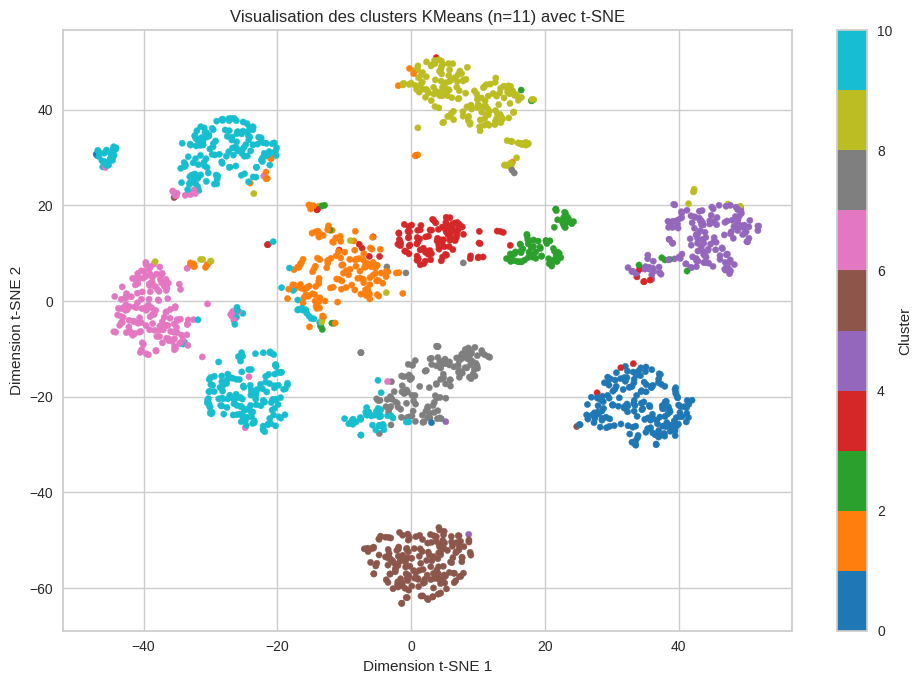

In [116]:
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# Affichage avec couleurs selon le cluster
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='tab10', s=20)

plt.title("Visualisation des clusters KMeans (n=11) avec t-SNE")
plt.xlabel("Dimension t-SNE 1")
plt.ylabel("Dimension t-SNE 2")
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

la représentation graphique avec TSNE met en évidence une structure de données bien segmentée. La majorité des clusters sont clairement délimités et apparaissent sous forme de nuages compacts et distincts, on peut ainsi dire qu'il y a une bonne séparation des clusters.
On observe également quelques points isolés ou de couleur différente à l’intérieur de certains clusters, ce qui pourrait indiquer la présence de cas atypiques ou de bruit.